## Claude Shyaka
## ID#: 801326243
## Homework 0: Linear Regression and Gradient Descent

### Problem 1: Linear Regression and Gradient descent with One explanatorry varible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/D3.csv", delimiter=",")

In [3]:
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [4]:
len(df)

100

In [ ]:
dataset = df.values[:,:]
print("dataset = ", dataset[:10, :])

dataset =  [[0.         3.44       0.44       4.38754501]
 [0.04040404 0.1349495  0.88848485 2.6796499 ]
 [0.08080808 0.82989899 1.3369697  2.96848981]
 [0.12121212 1.52484848 1.78545454 3.25406475]
 [0.16161616 2.21979798 2.23393939 3.53637472]
 [0.2020202  2.91474747 2.68242424 3.81541972]
 [0.24242424 3.60969697 3.13090909 4.09119974]
 [0.28282828 0.30464646 3.57939394 2.36371479]
 [0.32323232 0.99959596 0.02787879 3.83296487]
 [0.36363636 1.69454546 0.47636364 4.09894997]]


In [ ]:
X1, X2, X3 = df.values[:, 0], df.values[:, 1], df.values[:, 2] 
y = df.values[:, -1]

In [ ]:
def compute_loss(X, y, m, theta):
    """
    Compute loss for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    
    Output Parameters
    -----------------
    J : Scalar values. 
    """
    predictions = X.dot(theta) # predictions = h
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2*m) * np.sum(sqrErrors)
    
    return J

In [ ]:
def gradient_descent(X, y, m, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    alpha : Learning rate. Scalar value.
    iterations: Number of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : Final value. 1xn array of fitting parameters of weights. Dimension (1xn)
    cost_history : Contains value of cost for each iteration. Dimension (mx1)
    """
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1)
        errors = np.subtract(predictions, y) # Error (m,1) = temp
        sum_delta = (alpha/m) * X.transpose().dot(errors) # sum_delta (n,1)
        theta = theta - sum_delta
        loss_history[i] = compute_loss(X, y, m, theta)
    
    return theta, loss_history

In [ ]:
def RunLinearRegression(X, y, alpha):
    # Show a scatter plot of dependent variable and
    # its explanatory variable
    plt.scatter(X, y, color='red', marker='+')
    plt.grid()
    plt.rcParams["figure.figsize"] = (6, 6)
    plt.xlabel('Explanatory variable')
    plt.ylabel('Dependent variable')
    plt.title('Scatter plot for training data')
    plt.show()
    
    # Get the number of data points or sample size
    m = len(X)
    print('Sample size, m =', m)
    
    # Reshape the input matrix as a column vector
    X_ = X.reshape(m, 1)
    
    # Create the X0 column vector
    X0 = np.ones((m, 1))
    print('First five values of X0\n', X0[:5])
    
    # Combine the input matrix with the X0 vector
    X = np.hstack((X0, X_))
    print('First five values of X\n', X[:5])
    
    # Initialize the theta parameters
    theta = np.zeros((2, 1))
    print('Theta vector\n', theta)
    
    # compute the cost for theta values
    loss = compute_loss(X, y, m, theta)
    print('The cost for given values of thetas =', loss)
    
    # Initialize theta. set the number of iterations and
    # initialize alpha
    theta = [0., 0.]
    iterations = 2000;
    
    # Run the gradient descent with the given parameter
    theta, loss_history = gradient_descent(X, y, m, theta, alpha, iterations)
    print('Final value of theta\n', theta)
    print('Loss history\n', loss_history)
    
    # Plot the data and the model
    plt.scatter(X[:,1], y, color='red', marker='+', label='Training Data')
    plt.plot(X[:,1], X.dot(theta), color='green', label='Linear Regression')
    
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid()
    plt.xlabel('Explanatory variable, X')
    plt.ylabel('Dependent variable, y')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()
    
    # plot the loss history
    plt.plot(range(1, iterations+1), loss_history, color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')
    plt.show()




==========First Explanatory Variable=============


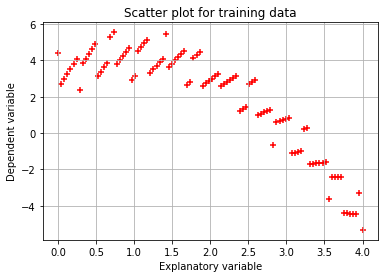

Sample size, m = 100
First five values of X0
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
First five values of X
 [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
Theta vector
 [[0.]
 [0.]]
The cost for given values of thetas = 552.4438459196241
Final value of theta
 [ 5.92794881 -2.03833659]
Loss history
 [5.36472185 5.24211647 5.14119415 ... 0.98499308 0.98499308 0.98499308]


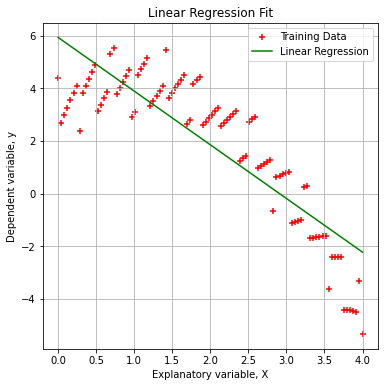

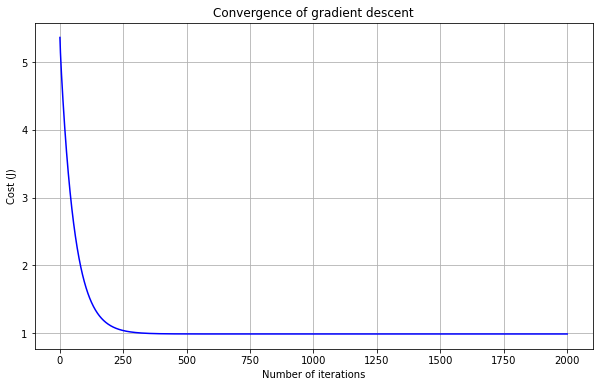




==========Second Explanatory Variable==============


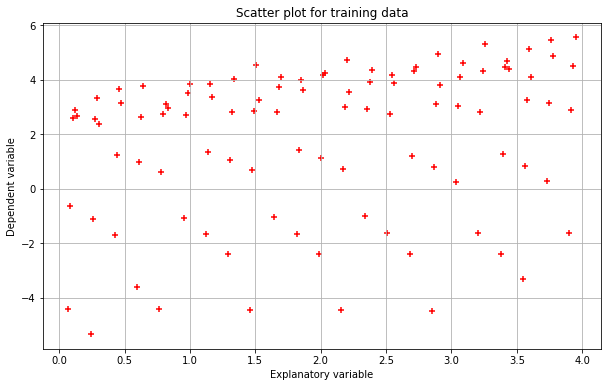

Sample size, m = 100
First five values of X0
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
First five values of X
 [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
Theta vector
 [[0.]
 [0.]]
The cost for given values of thetas = 552.4438459196241
Final value of theta
 [0.73606042 0.55760761]
Loss history
 [4.70583087 4.23968843 3.97417336 ... 3.59936602 3.59936602 3.59936602]


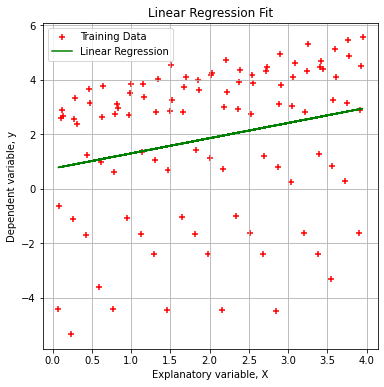

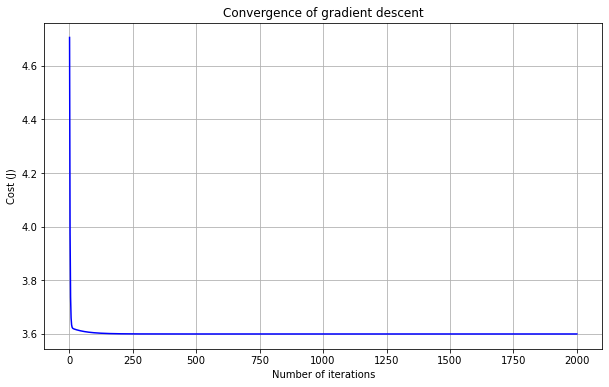




==========Third Explanatory Variable===============


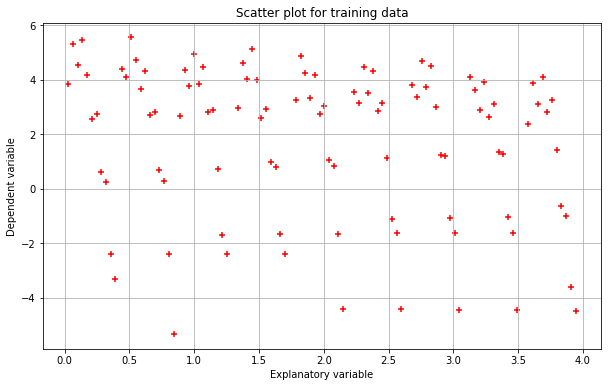

Sample size, m = 100
First five values of X0
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
First five values of X
 [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]
Theta vector
 [[0.]
 [0.]]
The cost for given values of thetas = 552.4438459196241
Final value of theta
 [ 2.87142207 -0.52048287]
Loss history
 [5.0989703  4.84545288 4.69183518 ... 3.62945112 3.62945112 3.62945112]


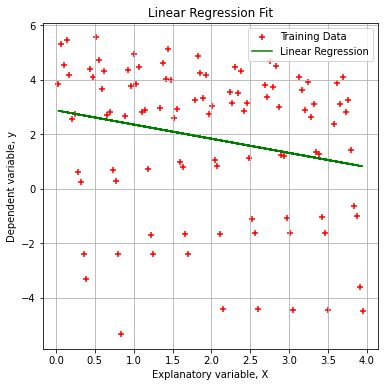

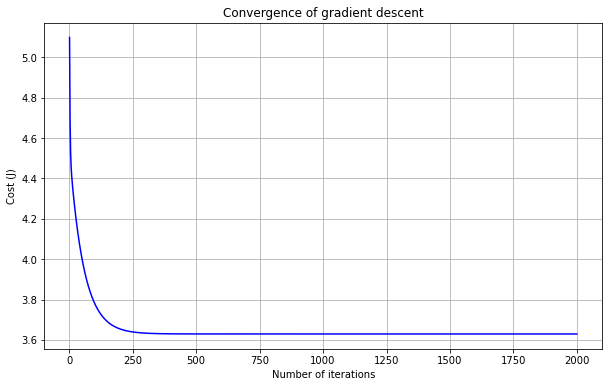

In [ ]:
print('\n\n\n==========First Explanatory Variable=============')
RunLinearRegression(X1, y, 0.04)
print('\n\n\n==========Second Explanatory Variable==============')
RunLinearRegression(X2, y, 0.04)
print('\n\n\n==========Third Explanatory Variable===============')
RunLinearRegression(X3, y, 0.04)

### Problem 2: Linear Regression and Gradient Descent for three explantory variables

In [ ]:
# Input dataset
X = dataset[:, :3]

# Linear regression with three explanatory variables
def RunLinearRegression1(X, y, alpha):
    m = len(X)
    n = len(X[0, :])

    # Reshape the input matrix as a column vector
    X_ = X.reshape(m, n)

    # Create the X0 column vector
    X0 = np.ones((m, 1))
    print('First five values of X0\n', X0[:5])

    # Combine the input matrix with the X0 vector
    X = np.hstack((X0, X_))
    print('First five values of X\n', X[:5])

    # Initialize the theta parameters
    theta = np.zeros((n+1, 1))
    print('Theta vector\n', theta)

    # compute the cost for theta values
    loss = compute_loss(X, y, m, theta)
    print('The cost for given values of thetas =', loss)

    # Initialize theta. set the number of iterations and
    # initialize alpha
    theta = [0., 0., 0., 0.]
    iterations = 2000;

    # Run the gradient descent with the given parameter
    theta, loss_history = gradient_descent(X, y, m, theta, alpha, iterations)
    print('Final value of theta\n', theta)
    print('Loss history\n', loss_history)

    # plot the loss history
    plt.plot(range(1, iterations+1), loss_history, color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')
    plt.show()

    # Predict a few data points using the learned model.
    X_test1 = np.array([1, 1, 1, 1])
    X_test2 = np.array([1, 2, 0, 4])
    X_test3 = np.array([1, 3, 2, 1])
    print('Predicted values of y from the given input.')
    print('Test input [1,1,1,1] ->', X_test1.dot(theta))
    print('Test input [1,2,0,4] ->', X_test2.dot(theta))
    print('Test input [1,3,2,1] ->', X_test3.dot(theta))

First five values of X0
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
First five values of X
 [[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]
Theta vector
 [[0.]
 [0.]
 [0.]
 [0.]]
The cost for given values of thetas = 552.4438459196241
Final value of theta
 [ 5.31240923 -2.00347093  0.53285382 -0.26534419]
Loss history
 [4.51455638 4.13668881 3.89647561 ... 0.73846441 0.73846441 0.73846441]


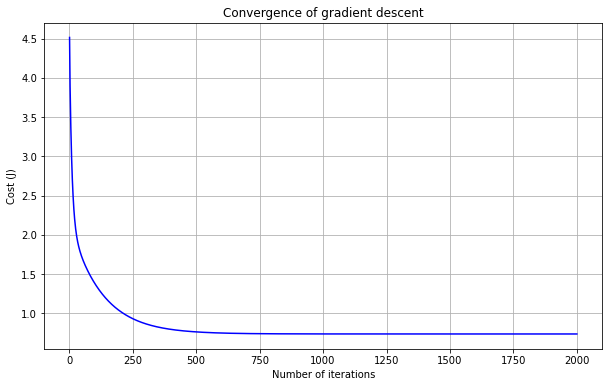

Predicted values of y from the given input.
Test input [1,1,1,1] -> 3.5764479393604938
Test input [1,2,0,4] -> 0.2440906221662169
Test input [1,3,2,1] -> 0.10235990291588304


In [ ]:
RunLinearRegression1(X, y, 0.04)